# Task 1: Data dimensionality, distance-based classifiers

## 1.1


For each digit d; (d = 0; 1; :::; 9); let us consider a cloud of points in 256-dimensional space, Cd, which consists of all training images (vectors) that represent d. For each cloud Cd we can calculate its center,
cd, which is just a 256-dimensional vector of means over all coordinates of vectors that belong to Cd. Once we have these centers, we can easily classify new images: by calculating the distance from the
vector that represents this image to each of the 10 centers, the closest center defines the label of the image. Next, calculate the distances between the centers of the 10 clouds, distij = dist(ci; cj ), for
i; j = 0; 1; :::9. Given all these distances, try to say something about the expected accuracy of your classifier. What pairs of digits seem to be most difficult to separate?

In [28]:
import numpy as np
import pandas as pd

In [29]:
#load train set
x_train = pd.read_csv("/content/train_in.csv", names=range(256))
y_train = pd.read_csv("/content/train_out.csv", names=['label'])

#load test set
x_test = pd.read_csv("/content/test_in.csv", names=range(256))
y_test = pd.read_csv("/content/test_out.csv", names=['label'])

In [30]:
#compute the centers for each digit
centers = {}
for digit in range(10):
    centers[digit] = x_train[y_train['label'] == digit].mean()

In [37]:
#generating the distances matrix
distances = [[np.linalg.norm(centers[i] - centers[j]) for i in range(10)] for j in range(10)]
distances = np.array(distances)

*    Digits 7 and 9 have the shortest distance of 5.43.

*   Digits 4 and 9 .

*   Digits 3 and 5 .

## 1.2


Experiment with three dimensionality reduction algorithms: PCA, U-MAP, T-SNE and apply them to the MNIST data to generate a visualization of the different classes, preferably in 2D. You are free to use any library to do this (preferably scikit-learn and umap-learn packages from PyPI.). Does the visualization agree with your intuitions and the between-class distance matrix distij?

In [ ]:
#!pip install umap-learn


In [25]:
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### PCA

In [38]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

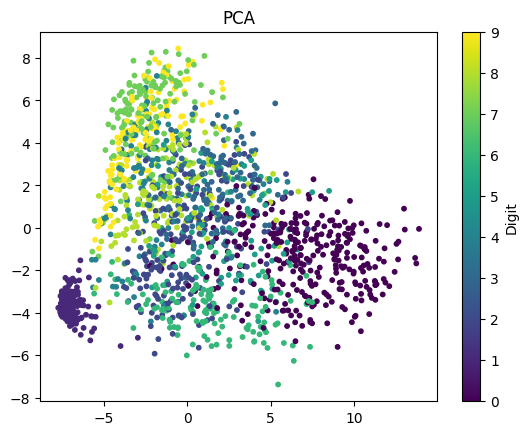

In [39]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train['label'], cmap='viridis', s=10)
plt.title('PCA')
cbar = plt.colorbar()
cbar.set_label('Digit')
plt.show()

### U-MAP

In [26]:
umap_model = umap.UMAP(n_components=2)
x_umap = umap_model.fit_transform(x_train)

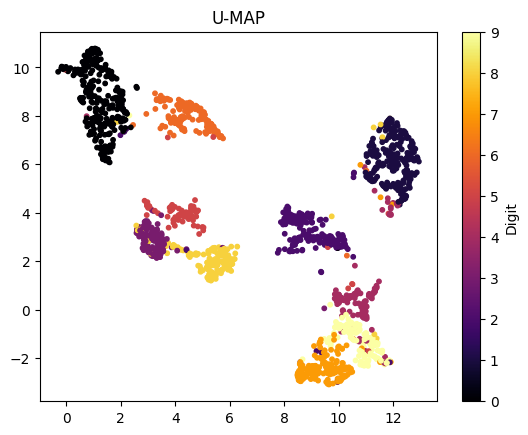

In [27]:
plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y_train['label'], cmap='inferno', s=10)
plt.title('U-MAP')
cbar = plt.colorbar()
cbar.set_label('Digit')
plt.show()

### T-SNE


In [10]:
tsne_model = TSNE(n_components=2)
x_tsne = tsne_model.fit_transform(x_train)

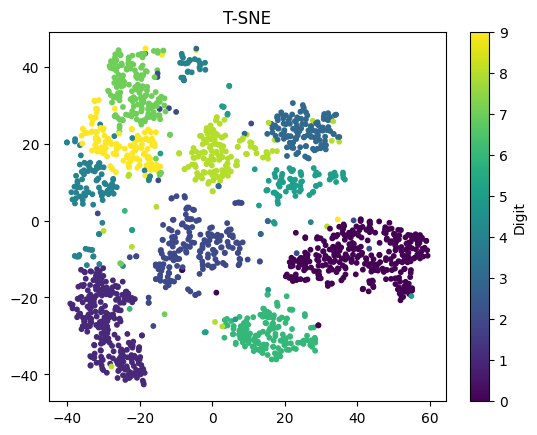

In [11]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train['label'], cmap='viridis', s=10)
plt.title('T-SNE')
cbar = plt.colorbar()
cbar.set_label('Digit')
plt.show()

## 1.3


Use the inter-class distances obtained in part 1 to implement a Nearest mean classifier. Apply your classifier to all points from the training set and calculate the percentage of correctly classified digits. Do the same with the test set, using the centers that were calculated from the training set.

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
def nearest_mean_classifier(x_data, centers):
    y_pred = []

    for index, x in x_data.iterrows():
        mindist = 1000
        pred = None

        for digit in range(10):
            dist = np.linalg.norm(x - centers[digit])
            if dist < mindist:
                mindist = dist
                pred = digit

        y_pred.append(pred)

    return pd.DataFrame({'label': y_pred})

In [42]:
#make the predictions with nearest mean classifier
y_train_pred = nearest_mean_classifier(x_train, centers)
y_test_pred = nearest_mean_classifier(x_test, centers)

train_accuracy = accuracy_score(y_train['label'], y_train_pred['label'])
test_accuracy = accuracy_score(y_test['label'], y_test_pred['label'])

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 86.35%
Test Accuracy: 80.40%


## 1.4

A less naive distance-based approach is the KNN (K-Nearest-Neighbor) classifier (you can either implement it yourself or use the one from sklearn package). Repeat the same procedure as in part 3
by using this method. Then, for both classifiers, generate a confusion matrix which should provide a deeper insight into classes that are difficult to separate. A confusion matrix is here a 10-by-10 matrix
(cij ), where cij contains the percentage (or count) of digits i that are classified as j. Which digits are most difficult to classify correctly? Again, for calculating and visualising confusion matrices you may
use the sklearn package. Describe your findings, and compare the performance of your classifiers on the train and test sets.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.values.ravel())

knn_predict_train = knn.predict(x_train)
knn_predict_test = knn.predict(x_test)

train_accuracy = accuracy_score(y_train, knn_predict_train)
test_accuracy = accuracy_score(y_test, knn_predict_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train Accuracy: 97.89%
Test Accuracy: 91.40%


In [45]:
class_labels = [str(i) for i in range(10)]

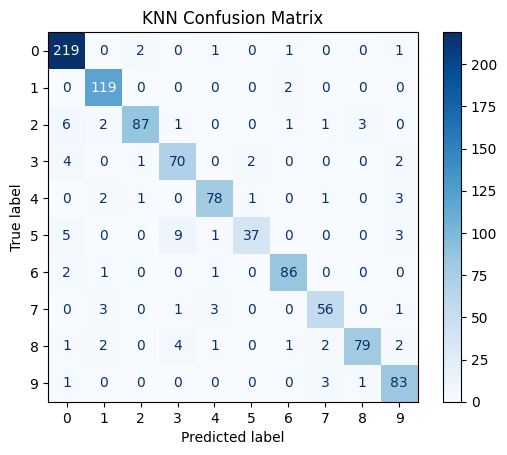

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, knn_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("KNN Confusion Matrix")
plt.show()

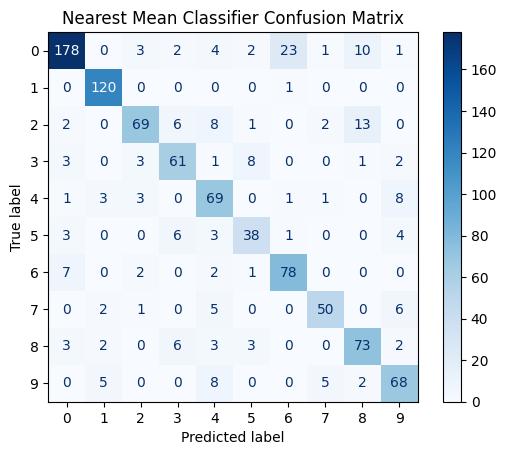

In [47]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Nearest Mean Classifier Confusion Matrix")
plt.show()